<a href="https://colab.research.google.com/github/ekramasif/Basic-Machine-Learning/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align='center'><big><b>Decision Tree Classification</b></big></p>

# Install Required Packages

In [1]:
!apt-get -qq install -y graphviz && pip install pydot

# Mounting Google Drive

In [2]:
#import data (test CSV)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Datasets

Mounted at /content/drive
/content/drive/MyDrive/Datasets


# Importing the libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import Image 
import pydotplus
import six
import sys
from six import StringIO

# Importing the dataset

In [4]:
dataset = pd.read_csv('golf-dataset.csv')
dataset.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


# Encoding categorical data on dataset

In [5]:
dataset = dataset.apply(LabelEncoder().fit_transform)

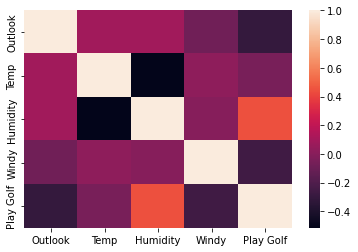

In [6]:
# Calculating the correlation matrix
corr = dataset.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

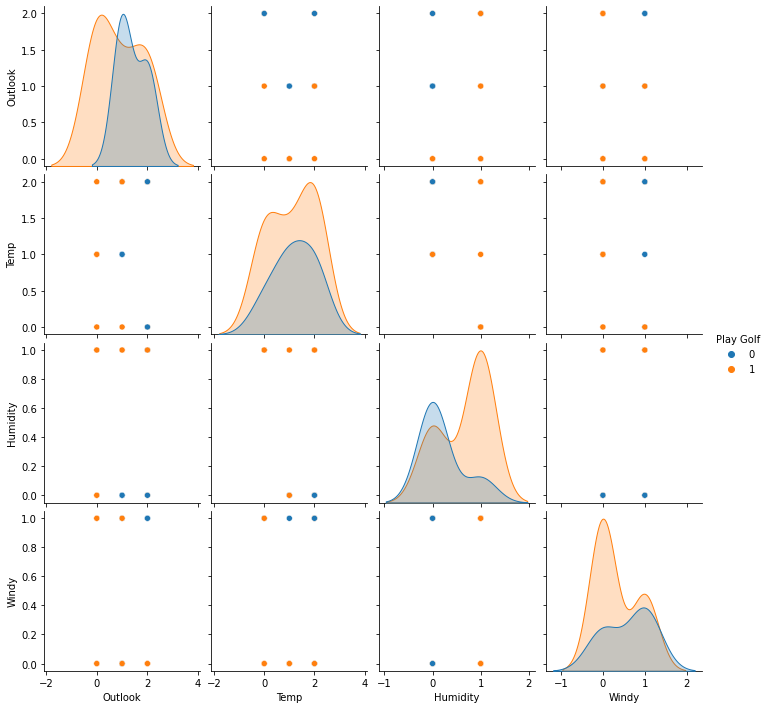

In [7]:
sns.pairplot(dataset,hue='Play Golf')

In [8]:
X = dataset.iloc[:, [0,3]].values
y = dataset.iloc[:, -1].values

In [9]:
X

array([[1, 0],
       [1, 1],
       [0, 0],
       [2, 0],
       [2, 0],
       [2, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [2, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [2, 1]])

# Taking care of missing data

In [10]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [11]:
X

array([[1, 0],
       [1, 1],
       [0, 0],
       [2, 0],
       [2, 0],
       [2, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [2, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [2, 1]])

# Splitting the dataset into the Training set and Test set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Feature Scaling

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.        , -0.75592895],
       [ 1.3540064 , -0.75592895],
       [ 1.3540064 , -0.75592895],
       [ 0.        ,  1.32287566],
       [ 0.        ,  1.32287566],
       [ 0.        , -0.75592895],
       [-1.3540064 , -0.75592895],
       [-1.3540064 , -0.75592895],
       [-1.3540064 ,  1.32287566],
       [ 1.3540064 ,  1.32287566],
       [ 0.        , -0.75592895]])

# Fitting Decision Tree Classification to the Training set

In [15]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0])

# Making the Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0]
 [0 2]]


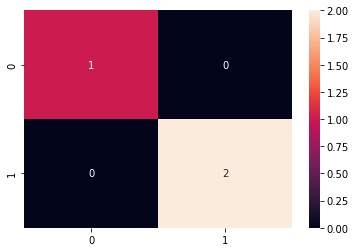

In [18]:
sns.heatmap(cm, annot=True)

In [23]:
print("Accuracy = ", accuracy_score(y_test, y_pred)*100,'%')
print()
print(classification_report(y_test,y_pred))

Accuracy =  100.0 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


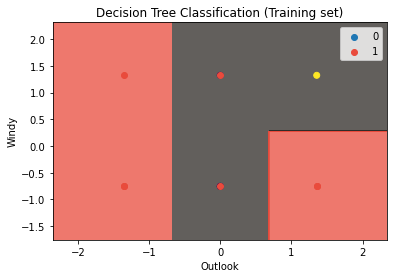

In [20]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#2D2926FF', '#E94B3CFF')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#2D2926FF', '#E94B3CFF'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Outlook')
plt.ylabel('Windy')
plt.legend()
plt.show()

# Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


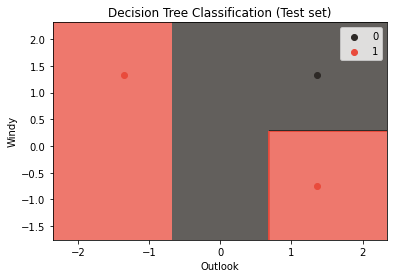

In [21]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#2D2926FF', '#E94B3CFF')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#2D2926FF', '#E94B3CFF'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Outlook')
plt.ylabel('Windy')
plt.legend()
plt.show()

# Decision Tree

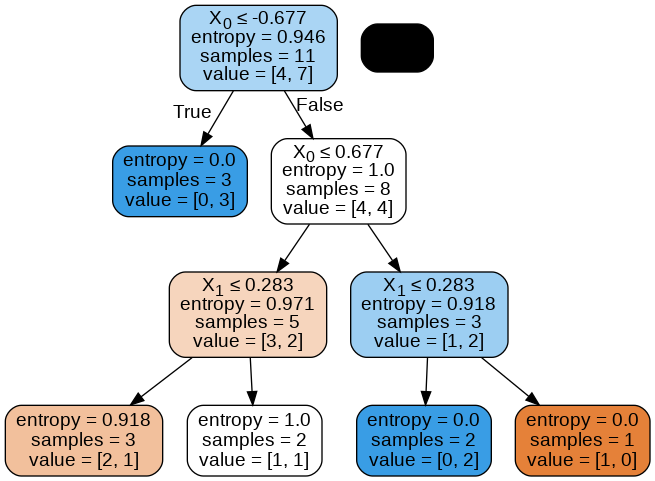

In [22]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())